# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | lazaro cardenas
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | nabire
Processing Record 6 of Set 1 | santana
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | linxia chengguanzhen
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | morehead city
Processing Record 11 of Set 1 | balaipungut
Processing Record 12 of Set 1 | tete
Processing Record 13 of Set 1 | dikhil
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | saucillo
Processing Record 16 of Set 1 | fada
Processing Record 17 of Set 1 | jashpurnagar
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | ta`u
Processing Record 20 of Set 1 | benghazi
Processing Record 21 of Set 1 | saint-pol-de-leon
Processing Record 22 of Set 1 | iqaluit
Processing Rec

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.57,89,24,1.79,NZ,1717914496
1,lazaro cardenas,17.9583,-102.2000,26.15,78,71,1.64,MX,1717914440
2,stanley,54.8680,-1.6985,10.99,78,20,8.23,GB,1717914499
3,bredasdorp,-34.5322,20.0403,8.62,89,0,1.39,ZA,1717914500
4,nabire,-3.3667,135.4833,29.54,73,64,1.77,ID,1717914501


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,89,24,1.79,NZ,1717914496
1,lazaro cardenas,17.9583,-102.2000,26.15,78,71,1.64,MX,1717914440
2,stanley,54.8680,-1.6985,10.99,78,20,8.23,GB,1717914499
3,bredasdorp,-34.5322,20.0403,8.62,89,0,1.39,ZA,1717914500
4,nabire,-3.3667,135.4833,29.54,73,64,1.77,ID,1717914501


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

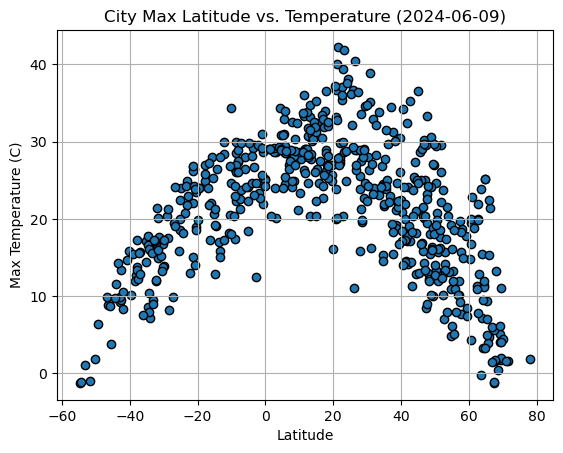

In [26]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date() #to get the date formated
plt.grid(True)
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("LatitudeVSTemperature.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

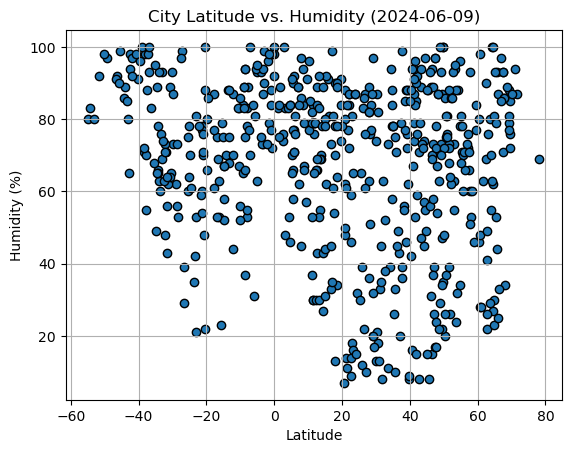

In [27]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date() #to get the date formated
plt.grid(True)
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

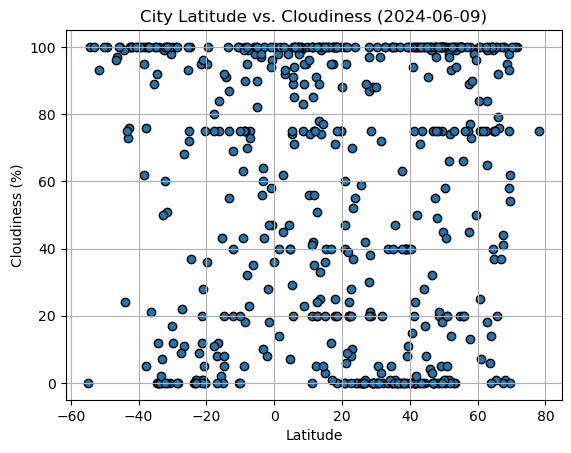

In [28]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date() #to get the date formated
plt.grid(True)
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("LatitudeVSCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

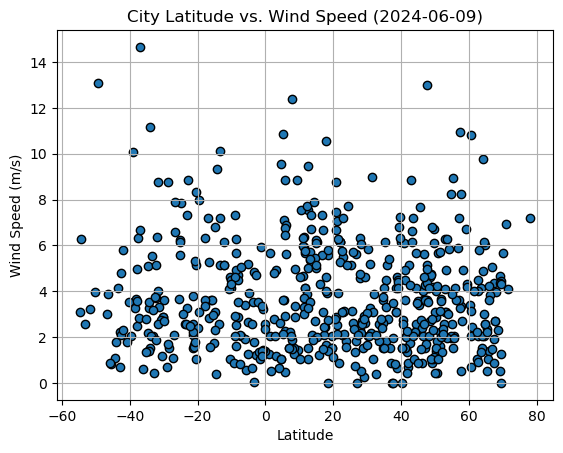

In [29]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date() #to get the date formated
plt.grid(True)
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("LatitudeVSWindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots   
def linear_regression(x_values, y_values, title, y_label, val1, val2):
    plt.scatter(x_values,y_values)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    plt.grid(True)
  
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(val1,val2),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data2_df = city_data_df[city_data_df['Lat'] >=0]
northern_hemi_df = city_data2_df
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lazaro cardenas,17.9583,-102.2000,26.15,78,71,1.64,MX,1717914440
2,stanley,54.8680,-1.6985,10.99,78,20,8.23,GB,1717914499
7,linxia chengguanzhen,35.6003,103.2064,23.89,33,47,1.84,CN,1717914505
9,morehead city,34.7229,-76.7260,24.45,84,0,1.54,US,1717914510
10,balaipungut,1.0500,101.2833,29.06,83,98,1.28,ID,1717914511


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

 # Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,89,24,1.79,NZ,1717914496
3,bredasdorp,-34.5322,20.0403,8.62,89,0,1.39,ZA,1717914500
4,nabire,-3.3667,135.4833,29.54,73,64,1.77,ID,1717914501
5,santana,-0.0583,-51.1817,25.10,100,100,2.57,BR,1717914502
6,ushuaia,-54.8000,-68.3000,-1.19,80,0,3.09,AR,1717914471


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5325230764486594


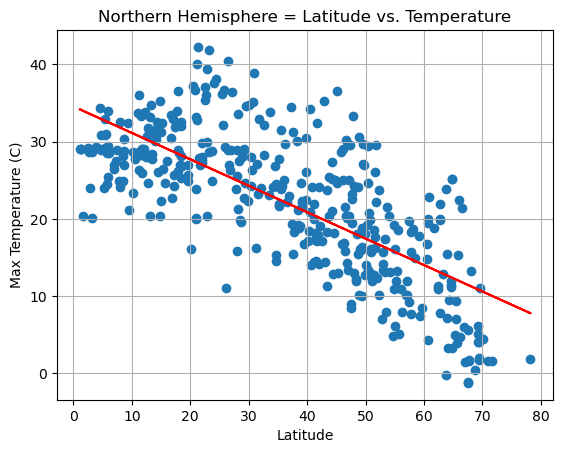

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
title = 'Northern Hemisphere = Latitude vs. Temperature'
y_label = 'Max Temperature (C)'
val1 = 0
val2 = -30

#calling the function
linear_regression(x_values, y_values, title, y_label, val1, val2)

The r-value is: 0.6650897808604717


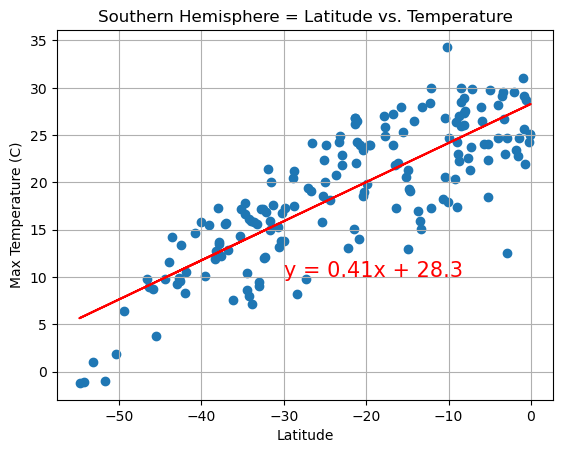

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
title = 'Southern Hemisphere = Latitude vs. Temperature'
y_label = 'Max Temperature (C)'
val1 = -30
val2 = 10

linear_regression(x_values, y_values, title, y_label, val1, val2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00033189229438202703


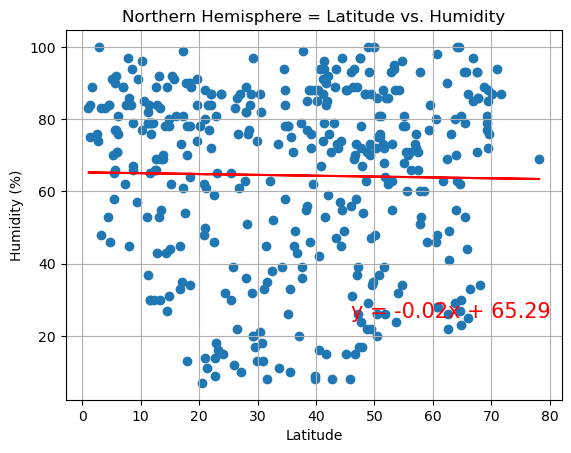

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
title = 'Northern Hemisphere = Latitude vs. Humidity'
y_label = 'Humidity (%)'
val1 = 46
val2 = 25

linear_regression(x_values, y_values, title, y_label, val1, val2)

The r-value is: 0.004248530781519067


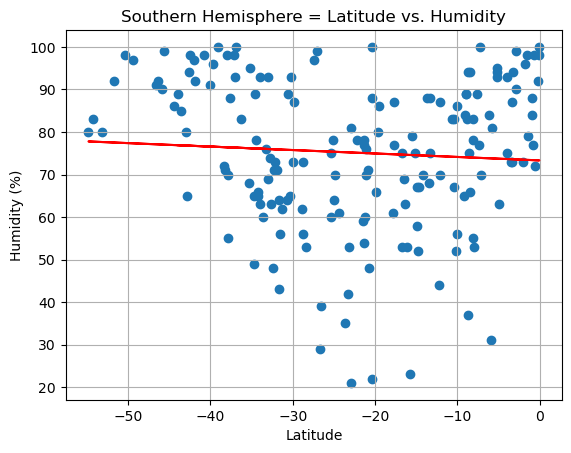

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
title = 'Southern Hemisphere = Latitude vs. Humidity'
y_label = 'Humidity (%)'
val1 = -55
val2 = 10

linear_regression(x_values, y_values, title, y_label, val1, val2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0006291611823104249


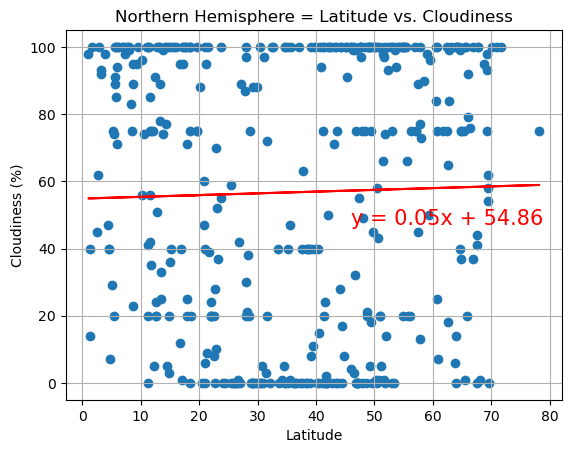

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = 'Northern Hemisphere = Latitude vs. Cloudiness'
y_label = 'Cloudiness (%)'
val1 = 46
val2 = 47

linear_regression(x_values, y_values, title, y_label, val1, val2)

The r-value is: 0.009757117690113414


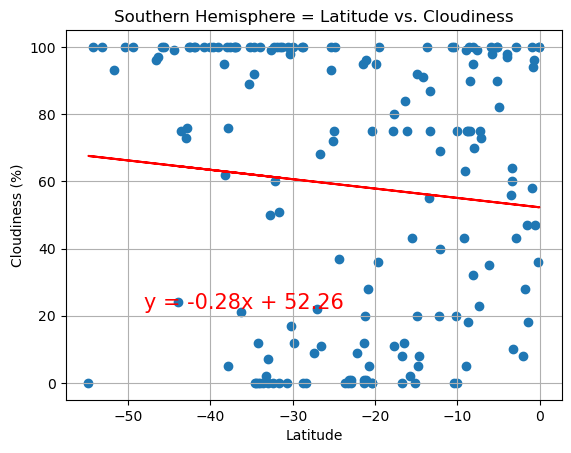

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
title = 'Southern Hemisphere = Latitude vs. Cloudiness'
y_label = 'Cloudiness (%)'
val1 = -48
val2 = 22

linear_regression(x_values, y_values, title, y_label, val1, val2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01002866753883656


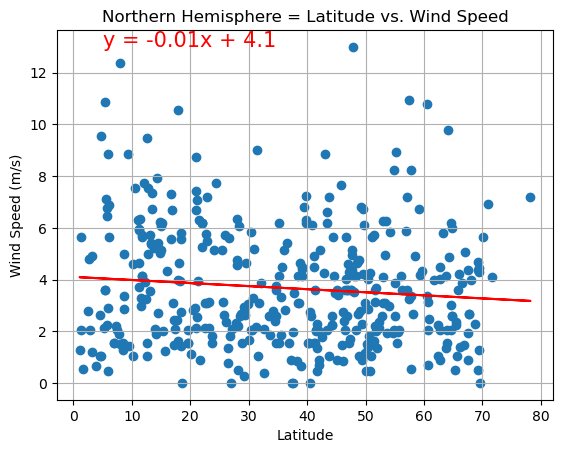

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = 'Northern Hemisphere = Latitude vs. Wind Speed'
y_label = 'Wind Speed (m/s)'
val1 = 5
val2 = 13

linear_regression(x_values, y_values, title, y_label, val1, val2)

The r-value is: 0.00992438796428968


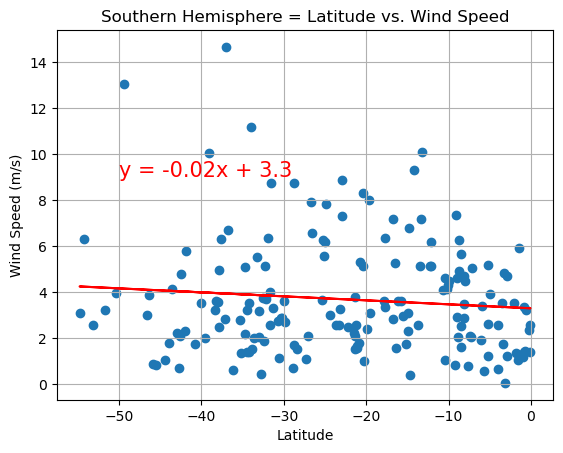

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
title = 'Southern Hemisphere = Latitude vs. Wind Speed'
y_label = 'Wind Speed (m/s)'
val1 = -50
val2 = 9

linear_regression(x_values, y_values, title, y_label, val1, val2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE